- Dataset : http://vis-www.cs.umass.edu/lfw/#download

- Dataset Structure :

```
DATASET\
    label_name_A\
        label_name_A_001.jpg
        label_name_A_002.jpg
        label_name_A_003.jpg
        .
        .
    label_name_B\
        label_name_B_001.jpg
        label_name_B_002.jpg
        label_name_B_003.jpg
        .
        .
```

In [23]:

# This will import Image and ImageEnhance modules
from PIL import Image, ImageEnhance
import numpy as np
  
# Opening Image
im = Image.open("E:\Tolik\KULIAH\Seminar\git\Face-Recognition-CNN-Keras-OpenCV-master\DATASET15KAWAN\Tolik\Test64.jpg")
  
# Creating object of Brightness class
im3 = ImageEnhance.Brightness(im)
im2 = ImageEnhance.Brightness(im)

# showing resultant image
im3.enhance(1.20).show()
im2.enhance(1.00).show()

In [2]:
import cv2
import numpy
  
# read image
src = cv2.imread('E:\Tolik\KULIAH\Seminar\git\Face-Recognition-CNN-Keras-OpenCV-master\DATASET15KAWAN\Tolik\Test64.jpg', cv2.IMREAD_UNCHANGED)
# cv2.imshow("FOto", img)
# apply guassian blur on src image
dst = cv2.GaussianBlur(src,(7,7),cv2.BORDER_DEFAULT)
 
# display input and output image

cv2.imshow("Gaussian Smoothing",numpy.hstack((src, dst)))
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

In [44]:
# import the Python Image processing Library

from PIL import Image

 

# Create an Image object from an Image

colorImage  = Image.open("E:\Tolik\KULIAH\Seminar\git\Face-Recognition-CNN-Keras-OpenCV-master\DATASET15KAWAN\Tolik\Test64.jpg")

rotated     = colorImage.rotate(-40)

rotated.show()


In [1]:
import os 
from cv2 import cv2 
import numpy as np
import matplotlib.pyplot as plt


# disable GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [3]:
#Path to the root image directory containing sub-directories of images
dataset_folder = "DATASET"

# data_slice = [70, 195, 78, 172] 
# # [ymin, ymax, xmin, xmax]
# # to extract the `interesting` part of the image files 
# # and avoid use statistical correlation from the background 

# # resize ratio to reduce sample dimension
# resize_ratio = 2.5

# h = int((data_slice[1] - data_slice[0])/resize_ratio) #ymax - ymin slice, Height of image in float
# w = int((data_slice[3] - data_slice[2])/resize_ratio) #xmax - xmin slice, Width of image in float 
# print("Image dimension after resize (h,w) :", h, w)

In [2]:
#Path to the root image directory containing sub-directories of images
dataset_folder = "DATAEDIT1"

In [3]:
# minimum number of sample for each class
sample_class = 39
class_name = []

for folder in os.listdir(dataset_folder):
    if len(os.listdir(os.path.join(dataset_folder, folder))) >= sample_class:
        class_name.append(folder)

In [4]:
def print_progress(val, val_len, folder, bar_size=20):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] (%d samples)\t label : %s \t\t" % (progr, val, folder), end="\r")

In [5]:
# preprocessin data using OpenCV
imgs = []
labels = []

faceCascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
for folder in class_name:
    folder_files = os.listdir(os.path.join(dataset_folder, folder))
    len_sub_folder = len(folder_files) - 1
    for i, filename in enumerate(folder_files):
        img = cv2.imread(os.path.join(dataset_folder, folder, filename))
        # dsize = (240,320)
        # img = cv2.resize(img, dsize)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray, 1.3, 5)
        # print("test")
        # print(faces)
        # for (x, y, w, h) in faces:
        #     data_slice = [y, int(y+h), x, int(x+w)]
        #     resize_ratio = 30
        #     h = int((data_slice[1] - data_slice[0])/resize_ratio) #ymax - ymin slice, Height of image in float
        #     w = int((data_slice[3] - data_slice[2])/resize_ratio) #xmax - xmin slice, Width of image in float
        #     print("Image dimension after resize (h,w) :", h, w)
        #     # faces_crop = gray[y:y + h, x:x + w]
        #     # cv2.imshow("test",faces_crop)
        #     # cv2.waitKey(0)
        for (x, y, w, h) in faces:
            croped = gray[y:y+h, x:x+w]
            resized = cv2.resize(croped, (64,64))
        # croped = gray[data_slice[0]:data_slice[1], data_slice[2]:data_slice[3]]
        imgs.append(resized)
        labels.append(folder)
        # print_progress(i, len_sub_folder, folder)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# preprocessin data using OpenCV
imgs = []
labels = []
for folder in class_name:
    folder_files = os.listdir(os.path.join(dataset_folder, folder))
    len_sub_folder = len(folder_files) - 1
    for i, filename in enumerate(folder_files):
        img = cv2.imread(os.path.join(dataset_folder, folder, filename))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        croped = gray[data_slice[0]:data_slice[1], data_slice[2]:data_slice[3]]
        resized = cv2.resize(croped, (w,h))
        imgs.append(resized)
        labels.append(folder)
        
        print_progress(i, len_sub_folder, folder)

In [6]:
print("Number of samples \t: ", len(labels))
print("Number of class \t: ", len(class_name))
print("Class name \t\t: \n", class_name)

Number of samples 	:  200
Number of class 	:  5
Class name 		: 
 ['Anton', 'Ari', 'Dewik', 'Era', 'Yayak']


In [9]:
cv2.imshow("preview sample image", imgs[0-120])

cv2.waitKey(0)
cv2.destroyAllWindows()

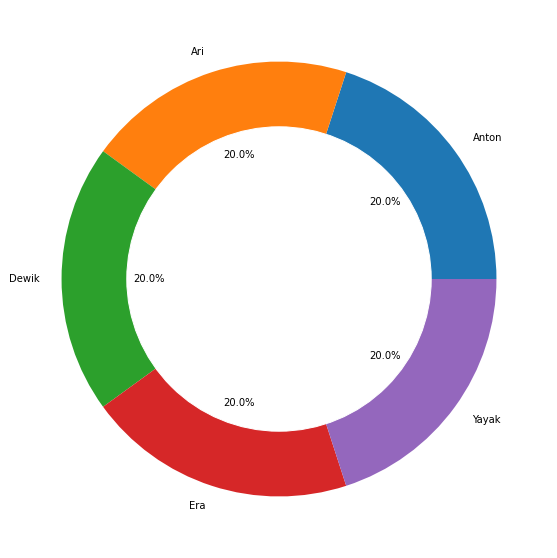

In [7]:
# preview data distribution

def print_data(label_distr, label_name):
    plt.figure(figsize=(20,10))

    my_circle = plt.Circle( (0,0), 0.7, color='white')
    plt.pie(label_distr, 
            labels=label_name,  
            autopct='%1.1f%%')

    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()
    
label_distr = {i:labels.count(i) for i in labels}.values()
print_data(label_distr, class_name)

### Balancing dataset

In [8]:
# reduce sample size per-class using numpy random choice
n = sample_class

def randc(labels, l):
    return np.random.choice(np.where(np.array(labels) == l)[0], n, replace=False)

mask = np.hstack([randc(labels, l) for l in np.unique(labels)])

In [9]:
balanced_labels = [labels[m] for m in mask]
balanced_imgs = [imgs[m] for m in mask]

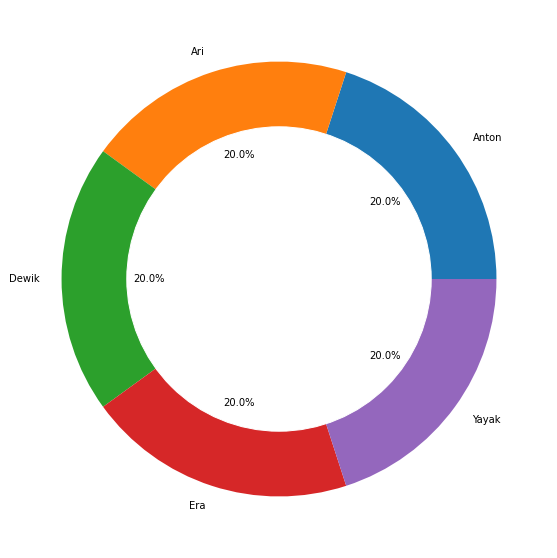

In [10]:
label_distr = {i:balanced_labels.count(i) for i in balanced_labels}.values()
print_data(label_distr, class_name)

### Prepare Dataset

In [11]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [12]:
X = np.array(balanced_imgs)

#### Label encoding & categoricalize output vector

In [13]:
le = LabelEncoder()
le.fit(balanced_labels)
le.classes_

array(['Anton', 'Ari', 'Dewik', 'Era', 'Yayak'], dtype='<U5')

In [14]:
class_name

['Anton', 'Ari', 'Dewik', 'Era', 'Yayak']

In [15]:
Y = le.transform(balanced_labels)
Y = to_categorical(Y)

#### Split dataset

In [16]:
X_train, X_test, y_train, y_test = \
                    train_test_split(X, 
                                     Y, 
                                     test_size=0.30, 
                                     random_state=4)
  
print("Dimensi data :\n")
print("X train \t X test \t Y train \t Y test")  
print("%s \t \t %s \t\t %s \t %s" % (X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Dimensi data :

X train 	 X test 	 Y train 	 Y test
(136, 64, 64) 	 	 (59, 64, 64) 		 (136, 5) 	 (59, 5)


### Build CNN Model

In [17]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout, Flatten, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [18]:
def resize_data(X_train, X_test):
    #
    # 4+D tensor with shape: batch_shape + (channels, rows, cols) if data_format='channels_first' or 
    # 4+D tensor with shape: batch_shape + (rows, cols, channels) if data_format='channels_last'.
    #
    print(K.image_data_format())
    if K.image_data_format() == 'channels_first':
        X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
        X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])
        input_shape = (1, X_train.shape[1], X_train.shape[2])
    else:
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
        # print(X_train.shape)
        input_shape = (X_train.shape[1], X_train.shape[2], 1)
    return X_train, X_test, input_shape


In [19]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [23]:
# def cnn_model(image_shape, output_size):
#     opt = Adam() #learning_rate=0.001
    
#     model = Sequential()
    
#     model.add(Conv2D(64,
#                     (3,3),
#                     padding="valid",
#                     activation="relu",
#                     input_shape=image_shape))
#     model.add(Conv2D(64,
#                     (3,3),
#                     padding="valid",
#                     activation="relu"))
#     model.add(MaxPool2D(pool_size=(2, 2)))
              
#     model.add(Dropout(0.2))
    
#     model.add(Conv2D(128,
#                     (3,3),
#                     padding="valid",
#                     activation="relu"))
#     model.add(Conv2D(128,
#                     (3,3),
#                     padding="valid",
#                     activation="relu"))
#     model.add(MaxPool2D(pool_size=(2, 2)))

#     model.add(Flatten())
    
#     model.add(Dropout(0.2))
#     model.add(Dense(512, activation="relu"))
#     model.add(Dropout(0.2))
#     model.add(Dense(256, activation="relu"))
#     model.add(Dense(output_size))
#     model.add(Activation("softmax"))
    
#     model.summary() 
    
#     model.compile(optimizer=opt, 
#                   loss='categorical_crossentropy',
#                   metrics = ['accuracy', precision, recall])

#     return model

In [20]:
def cnn_model(image_shape, output_size):
    opt = Adam() #learning_rate=0.001
    
    model = Sequential()
    
    model.add(Conv2D(32,
                    (3,3),
                    padding="same",
                    activation="relu",
                    input_shape=image_shape))
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64,
                    (3,3),
                    padding="same",
                    activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())
    
    model.add(Dropout(0.2))
    model.add(Dense(256, activation="relu"))
    model.add(Dense(output_size))
    model.add(Activation("softmax"))
    
    model.summary() 
    
    model.compile(optimizer=opt, 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy', precision, recall])

    return model

In [21]:
X_train, X_test, input_shape = resize_data(X_train, X_test)
EPOCHS = 40
BATCH_SIZE = 64

model = cnn_model(input_shape, len(class_name))


callbacks = [EarlyStopping(monitor='val_loss', patience=10),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)]
    
history = model.fit(X_train, 
                      y_train,
                      epochs=EPOCHS,
                      batch_size=BATCH_SIZE,
                      callbacks=callbacks,
                      validation_data=(X_test,y_test))

model.load_weights('best_model.h5')

channels_last
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dropout (Dropout)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 256)  

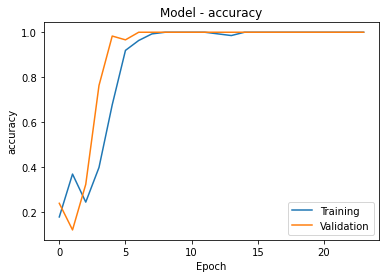

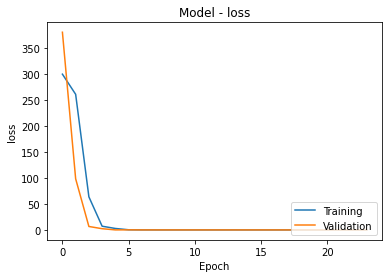

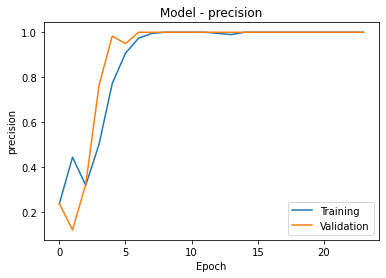

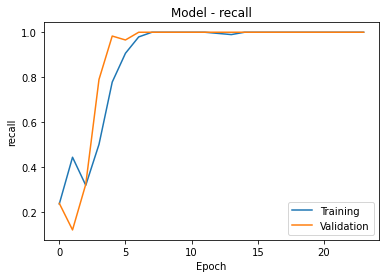

In [22]:
def evaluate_model(history):
    names = [['accuracy', 'val_accuracy'], 
             ['loss', 'val_loss'], 
             ['precision', 'val_precision'], 
             ['recall', 'val_recall']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.show()
        
evaluate_model(history)

In [23]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

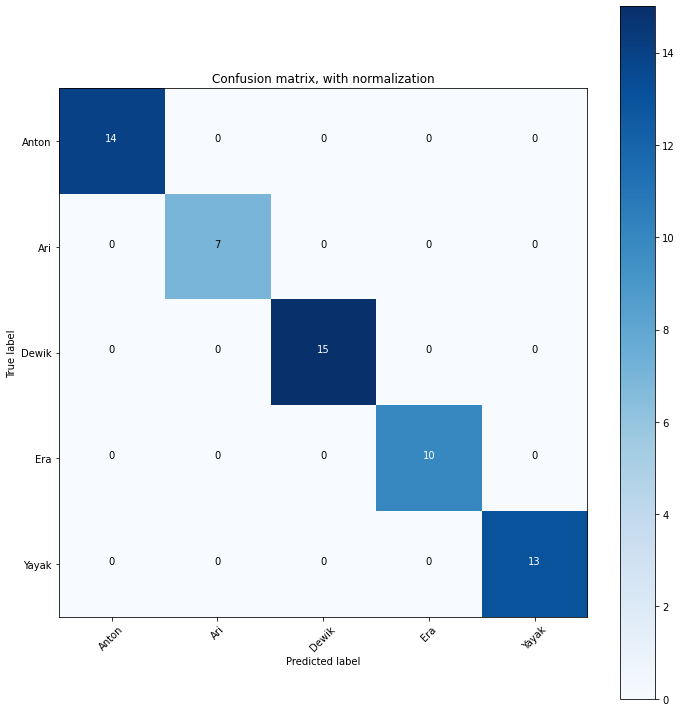

In [24]:
# predict test data
y_pred=model.predict(X_test)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, 
                      classes=class_name,
                      normalize=False,
                      title='Confusion matrix, with normalization')


In [25]:
print(classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=class_name))

              precision    recall  f1-score   support

       Anton       1.00      1.00      1.00        14
         Ari       1.00      1.00      1.00         7
       Dewik       1.00      1.00      1.00        15
         Era       1.00      1.00      1.00        10
       Yayak       1.00      1.00      1.00        13

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



Tolik Punya

In [1]:
data_slice = [70, 195, 78, 172] 
# [ymin, ymax, xmin, xmax]
# to extract the `interesting` part of the image files 
# and avoid use statistical correlation from the background 

# resize ratio to reduce sample dimension
resize_ratio = 2.5

h = int((data_slice[1] - data_slice[0])/resize_ratio) #ymax - ymin slice, Height of image in float
w = int((data_slice[3] - data_slice[2])/resize_ratio) #xmax - xmin slice, Width of image in float 
print("Image dimension after resize (h,w) :", h, w)

Image dimension after resize (h,w) : 50 37


In [34]:
# import face_recognition
from PIL import Image
import numpy as np
from numpy import asarray
from cv2 import cv2

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
image = cv2.imread('E:\Tolik\KULIAH\Seminar\git\Face-Recognition-CNN-Keras-OpenCV-master\DATAUJI1\Ari\Ari-10B1.jpg')
dsize = (250,250)
image = cv2.resize(image, dsize)
# cv2.imshow("image", image)  
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    data_slice = [y, int(y+h), x, int(x+w)]
    resize_ratio = 50
    h = int((data_slice[1] - data_slice[0])/resize_ratio)
    w = int((data_slice[3] - data_slice[2])/resize_ratio)
    
    # preprocessing
    face_crop = gray[data_slice[0]:data_slice[1], data_slice[2]:data_slice[3]]
    FaceImage = cv2.resize(face_crop, (64,64))
    cv2.imshow("face", FaceImage)
    
    FaceImage, __, __ = resize_data(np.array([FaceImage]), np.array([FaceImage]))

    # predict image
    predicted_obj = model.predict(FaceImage)
    print(predicted_obj)
    predicted_class = class_name[np.argmax(predicted_obj)]
    print(predicted_class)
    confidence_level = np.round(np.max(predicted_obj), 3)*100.0
    print(confidence_level)

    print(predicted_obj, end="\r")         

cv2.waitKey(0)
cv2.destroyAllWindows()


channels_last
[[2.01e-03 3.52e-04 9.85e-04 2.65e-03 9.94e-01]]
Yayak
99.40000176429749


## Model Inference Test

In [31]:
import face_recognition
from PIL import Image
import numpy as np
from numpy import asarray
from cv2 import cv2

cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

cap.set(3,640)
cap.set(4,480)

while(True):
    # Capture frame-by-frame
    test = []
    face = []
    ret, frame = cap.read()
    xv, yv, cv = frame.shape
    if ret == True :
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        try :
            for (x,y,wf,hf) in faces:
                cy, cx = y + (hf//2), x + (wf//2)
                max_len = max(hf,wf) + 70

                if (x - max_len) <= 0 or (x + max_len) >= xv or (y - max_len) <= 0 or (y + max_len) >= yv :
                    continue

                # preprocessing
                face_crop = gray[cy-max_len:cy+max_len, cx-max_len:cx+max_len]
                print(face_crop)
                face_crop = cv2.resize(face_crop, (250,250))
                print(data_slice[0])
                face_crop = face_crop[data_slice[0]:data_slice[1], data_slice[2]:data_slice[3]]
                FaceImage = cv2.resize(face_crop, (w,h))
                cv2.imshow("face", FaceImage)
                
                FaceImage, __, __ = resize_data(np.array([FaceImage]), np.array([FaceImage]))

                # predict image
                predicted_obj = model.predict(FaceImage)
                predicted_class = class_name[np.argmax(predicted_obj)]
                confidence_level = np.round(np.max(predicted_obj), 3)*100.0

                # print(predicted_obj, end="\r")         

                if confidence_level >= 70 :
                    # create box on detected face
                    frame = cv2.rectangle(frame,(cx-max_len,cy-max_len),(cx+max_len,cy+max_len),(0,0,255),1)

                    frame = cv2.rectangle(frame,(x,y),(x+wf,y+hf),(255,0,0),1)
                    frame = cv2.rectangle(frame,(x,y+hf),(x+wf,y+hf+30),(255,0,0),-1)

                    # print label name on image
                    cv2.putText(frame,
                                "%s (%.1f)" % (predicted_class, confidence_level),
                                (x + x//10, y+hf+20),
                                cv2.FONT_HERSHEY_SIMPLEX,
                                0.4,
                                (255, 255, 255), 1)
            cv2.imshow('frame',frame)
        except:
            cv2.imshow('frame',frame)
        
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


[[116 116 116 ...  74  75  77]
 [117 116 116 ...  74  74  77]
 [118 118 118 ...  73  74  74]
 ...
 [ 85  85  81 ...  28  28  29]
 [ 81  81  80 ...  28  28  28]
 [ 81  81  79 ...  29  28  29]]
[[116 116 116 ...  74  75  77]
 [117 116 116 ...  74  74  77]
 [118 118 118 ...  73  74  74]
 ...
 [ 85  85  81 ...  28  28  29]
 [ 81  81  80 ...  28  28  28]
 [ 81  81  79 ...  29  28  29]]
[[141 140 141 ... 177 176 177]
 [140 140 140 ... 176 175 176]
 [139 138 139 ... 176 175 176]
 ...
 [104 104 105 ... 103 104 102]
 [104 104 104 ... 101 101  99]
 [104 104 105 ... 101 103 101]]
[[141 140 141 ... 177 176 177]
 [140 140 140 ... 176 175 176]
 [139 138 139 ... 176 175 176]
 ...
 [104 104 105 ... 103 104 102]
 [104 104 104 ... 101 101  99]
 [104 104 105 ... 101 103 101]]
